# Small World Phenomenon

#### 1. Making a small world network
#### 2. Myopic Search

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

#### Goal : To find out the relationship between diameter and number of rewirings

* #### Note : Here rewriting is done by only adding new edges (not deleting)

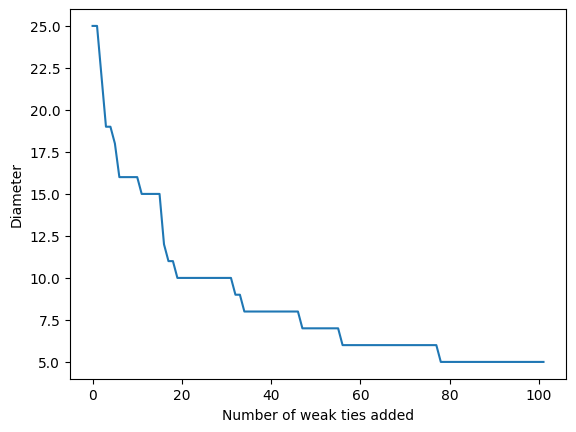

In [2]:
# Adding 4 edges to neighboring nodes
def add_edges(G):
  list_nodes= list(G.nodes())
  n= len(list_nodes)

  for i in range(0,n):
    G.add_edge(list_nodes[i],list_nodes[i-1])
    G.add_edge(list_nodes[i],list_nodes[i-2])
    G.add_edge(list_nodes[i],list_nodes[(i+1)%n])
    G.add_edge(list_nodes[i],list_nodes[(i+2)%n])

# Rewiring - Adding weak ties
def add_long_link(G):
  list_nodes= list(G.nodes())
  v1= random.choice(list_nodes)
  v2= random.choice(list_nodes)

  while(v1==v2):
    v1= random.choice(list_nodes)
    v2= random.choice(list_nodes)
  G.add_edge(v1,v2)


G= nx.Graph()
G.add_nodes_from(range(0,100))


add_edges(G) 
"""
for each in G.nodes():
  print(each, " : ", end=" ")
  for each1 in G.neighbors(each):
    print(each1,end=" ")
  print("\n")
"""

#add_long_link(G)
x= [0]
y= [nx.diameter(G)]
t=0
while(t<=100):
  add_long_link(G)
  t+=1
  x.append(t)
  y.append(nx.diameter(G))


#nx.draw(G, with_labels=True)

plt.xlabel("Number of weak ties added")
plt.ylabel("Diameter")
plt.plot(x,y)

plt.show()

### Decentralized Search / Myopic Search

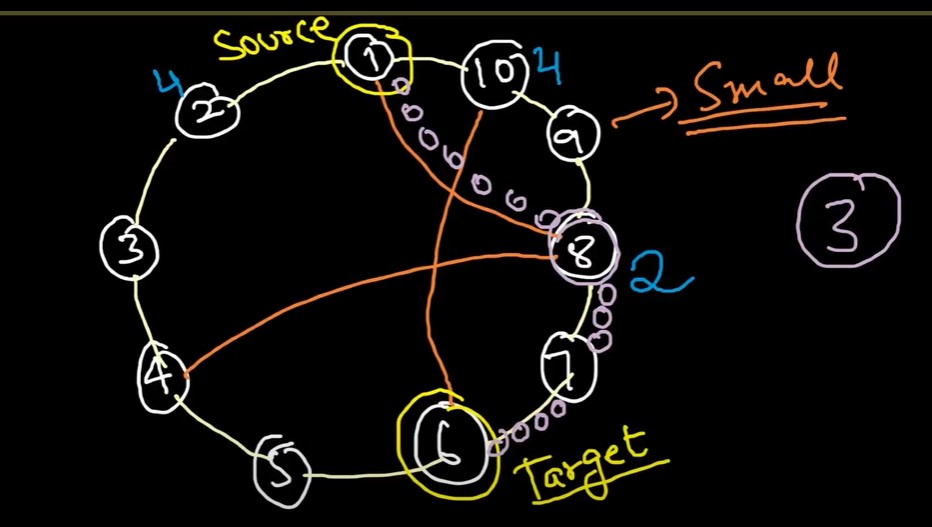

* #### Here the source node passes the letter to its neighbor who is more close to the target than others. 
* #### The source node can't see the weak ties in the network. (Decentralized)
* #### So the path is : 1 (source) --> 8 --> 7 --> 6 (target)
* #### Total distance = 3



* #### There's another path with less distance : 1 --> 10 --> 6
* #### Myopic Search is not optimal. It follows greedy approach.
* #### Time Complexity of Myopic Search : log n

#### Goal : To find out the relationship between avg time taken to go from source to target and number of nodes

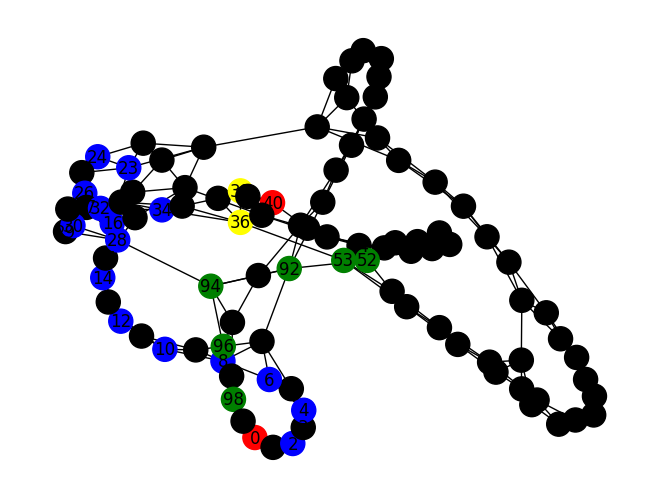

In [3]:
# Adding 4 edges to neighboring nodes
def add_edges(G):
  list_nodes= list(G.nodes())
  n= len(list_nodes)

  for i in range(0,n):
    G.add_edge(list_nodes[i],list_nodes[i-1])
    G.add_edge(list_nodes[i],list_nodes[i-2])
    G.add_edge(list_nodes[i],list_nodes[(i+1)%n])
    G.add_edge(list_nodes[i],list_nodes[(i+2)%n])

# Rewiring - Adding weak ties
def add_long_link(G):
  list_nodes= list(G.nodes())
  v1= random.choice(list_nodes)
  v2= random.choice(list_nodes)

  while(v1==v2):
    v1= random.choice(list_nodes)
    v2= random.choice(list_nodes)
  G.add_edge(v1,v2)

# Finds the neighbor closest to target
def find_best_neighbor(G,c,v):
  dis= G.number_of_nodes()
  
  for each in G.neighbors(c):
    dis1= len(nx.shortest_path(H, source=each, target=v))

    if dis1<dis:
      dis=dis1
      choice= each
  return choice

# Decentralised Search
def myopic_search(G,u,v):
  path= [u]
  current= u

  while(1):
    w= find_best_neighbor(G,current,v)
    path.append(w)
    current=w

    if current==v:
      break
  return path


def set_path_colors(G,p,p1):
  c=[]
  for each in G.nodes():
    if each==p1[0]:
      c.append('red')
    if each==p1[len(p1)-1]:
      c.append('red')
    if each in p and each in p1 and each!=p1[0] and each!=p1[len(p1)-1]:
      c.append('yellow')
    if each in p and each not in p1:
      c.append('blue')
    if each in p1 and each not in p:
      c.append('green')
    if each not in p and each not in p1:
      c.append('black')
  return c


G= nx.Graph()
G.add_nodes_from(range(0,100))
add_edges(G) 
H= G.copy()

x= [0]
y= [nx.diameter(G)]
t=0
while(t<=10):
  add_long_link(G)
  t+=1
  x.append(t)
  y.append(nx.diameter(G))

p= myopic_search(G,0,40)
p1= nx.shortest_path(G, source=0, target=40)
colors= set_path_colors(G,p,p1)

nx.draw(G, node_color=colors, with_labels=True)
plt.show()

### Myopic Search vs Optimal Search

#### Goal : Comparing the shortest path between 2 diametrically opposite nodes by Myopic Search and Optimal Search

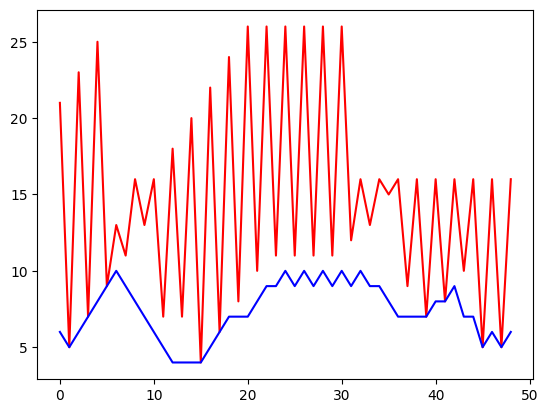

In [4]:
# Adding 4 edges to neighboring nodes
def add_edges(G):
  list_nodes= list(G.nodes())
  n= len(list_nodes)

  for i in range(0,n):
    G.add_edge(list_nodes[i],list_nodes[i-1])
    G.add_edge(list_nodes[i],list_nodes[i-2])
    G.add_edge(list_nodes[i],list_nodes[(i+1)%n])
    G.add_edge(list_nodes[i],list_nodes[(i+2)%n])

# Rewiring - Adding weak ties
def add_long_link(G):
  list_nodes= list(G.nodes())
  v1= random.choice(list_nodes)
  v2= random.choice(list_nodes)

  while(v1==v2):
    v1= random.choice(list_nodes)
    v2= random.choice(list_nodes)
  G.add_edge(v1,v2)

# Finds the neighbor closest to target
def find_best_neighbor(G,c,v):
  dis= G.number_of_nodes()
  
  for each in G.neighbors(c):
    dis1= len(nx.shortest_path(H, source=each, target=v))

    if dis1<dis:
      dis=dis1
      choice= each
  return choice

# Decentralised Search
def myopic_search(G,u,v):
  path= [u]
  current= u

  while(1):
    w= find_best_neighbor(G,current,v)
    path.append(w)
    current=w

    if current==v:
      break
  return path


def set_path_colors(G,p,p1):
  c=[]
  for each in G.nodes():
    if each==p1[0]:
      c.append('red')
    if each==p1[len(p1)-1]:
      c.append('red')
    if each in p and each in p1 and each!=p1[0] and each!=p1[len(p1)-1]:
      c.append('yellow')
    if each in p and each not in p1:
      c.append('blue')
    if each in p1 and each not in p:
      c.append('green')
    if each not in p and each not in p1:
      c.append('black')
  return c


G= nx.Graph()
G.add_nodes_from(range(0,100))
add_edges(G) 
H= G.copy()

x= [0]
y= [nx.diameter(G)]
t=0
while(t<=10):
  add_long_link(G)
  t+=1
  x.append(t)
  y.append(nx.diameter(G))


m= [] # Path lengths corresponding to the Myopic Search
o= [] # Path lengths corresponding to the Optimal Search
x= [] # Each point on x axis is one pair of nodes - (0,50)(1,51)
t= 0

for u in range(0,49):
  v= u+50
  p= myopic_search(G,u,v)
  p1= nx.shortest_path(G, source=u, target=v)
  m.append(len(p))
  o.append(len(p1))
  x.append(t)
  t+=1

plt.plot(x,m,'r')
plt.plot(x,o,'b')
plt.show()

#### Conclusion : Most of the times Myopic Search takes large number of steps than Optimal Search. In some cases it takes as much steps as Optimal Search.




### Number of Steps (Time) taken by Myopic Search

100 12.387755102040817
200 20.78787878787879
300 28.892617449664428
400 24.78894472361809
500 33.036144578313255
600 33.642140468227424
700 34.55300859598854
800 32.91729323308271
900 40.1804008908686
1000 46.28456913827655


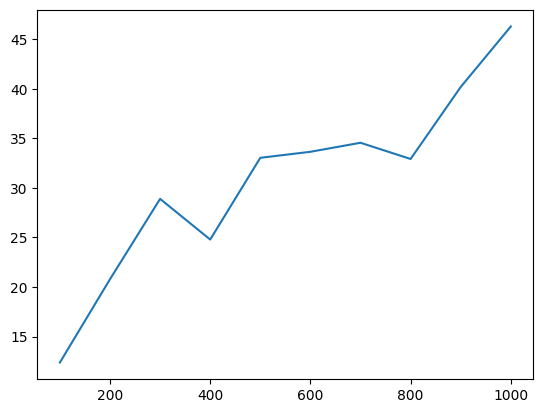

In [5]:
# Adding 4 edges to neighboring nodes
def add_edges(G):
  list_nodes= list(G.nodes())
  n= len(list_nodes)

  for i in range(0,n):
    G.add_edge(list_nodes[i],list_nodes[i-1])
    G.add_edge(list_nodes[i],list_nodes[i-2])
    G.add_edge(list_nodes[i],list_nodes[(i+1)%n])
    G.add_edge(list_nodes[i],list_nodes[(i+2)%n])

# Rewiring - Adding weak ties
def add_long_link(G):
  list_nodes= list(G.nodes())
  v1= random.choice(list_nodes)
  v2= random.choice(list_nodes)

  while(v1==v2):
    v1= random.choice(list_nodes)
    v2= random.choice(list_nodes)
  G.add_edge(v1,v2)

# Finds the neighbor closest to target
def find_best_neighbor(G,c,v):
  dis= G.number_of_nodes()
  
  for each in G.neighbors(c):
    dis1= len(nx.shortest_path(H, source=each, target=v))

    if dis1<dis:
      dis=dis1
      choice= each
  return choice

# Decentralised Search
def myopic_search(G,u,v):
  path= [u]
  current= u

  while(1):
    w= find_best_neighbor(G,current,v)
    path.append(w)
    current=w

    if current==v:
      break
  return path


def set_path_colors(G,p,p1):
  c=[]
  for each in G.nodes():
    if each==p1[0]:
      c.append('red')
    if each==p1[len(p1)-1]:
      c.append('red')
    if each in p and each in p1 and each!=p1[0] and each!=p1[len(p1)-1]:
      c.append('yellow')
    if each in p and each not in p1:
      c.append('blue')
    if each in p1 and each not in p:
      c.append('green')
    if each not in p and each not in p1:
      c.append('black')
  return c


x1= []
y1= []

for num in range(100,1100,100):
  G= nx.Graph()
  G.add_nodes_from(range(0,num))
  add_edges(G) 
  H= G.copy()

  x= [0]
  y= [nx.diameter(G)]
  t=0
  while(t<=G.number_of_nodes()/10):
    add_long_link(G)
    t+=1
    x.append(t)
    y.append(nx.diameter(G))


  m= [] # Path lengths corresponding to the Myopic Search
  t= 0

  for u in range(0,G.number_of_nodes()//2-1):
    v= u+G.number_of_nodes()/2
    p= myopic_search(G,u,v)
    m.append(len(p))
    x.append(t)
    t+=1

  print(G.number_of_nodes(), np.average(m))
  y1.append(np.average(m))
  x1.append(G.number_of_nodes())

plt.plot(x1,y1)
plt.show()

# How to be viral ?

#### Depends on 
* #### Novelty of meme
* #### Structure of network
* #### Key nodes

## K Shell Decomposition

* #### K-shell decomposition determine core nodes who individually might be the most influential spreaders for the spreading originating in a single origin. 

* #### K-shell decomposition is the method in which we can divide nodes on the basis of the number of its degree like nodes with degree 1 in one bucket etc.

* #### Consider an example, assume there are n nodes and you apply k-shell decomposition in it. So nodes with degree 1 will be in bucket1 then we will see that after disconnecting these nodes is there any node left with degree 1 if yes then we will add them in bucket 1 and again check and repeat these steps for degree 2, 3, and so on and put them in bucket2, bucket3, etc.

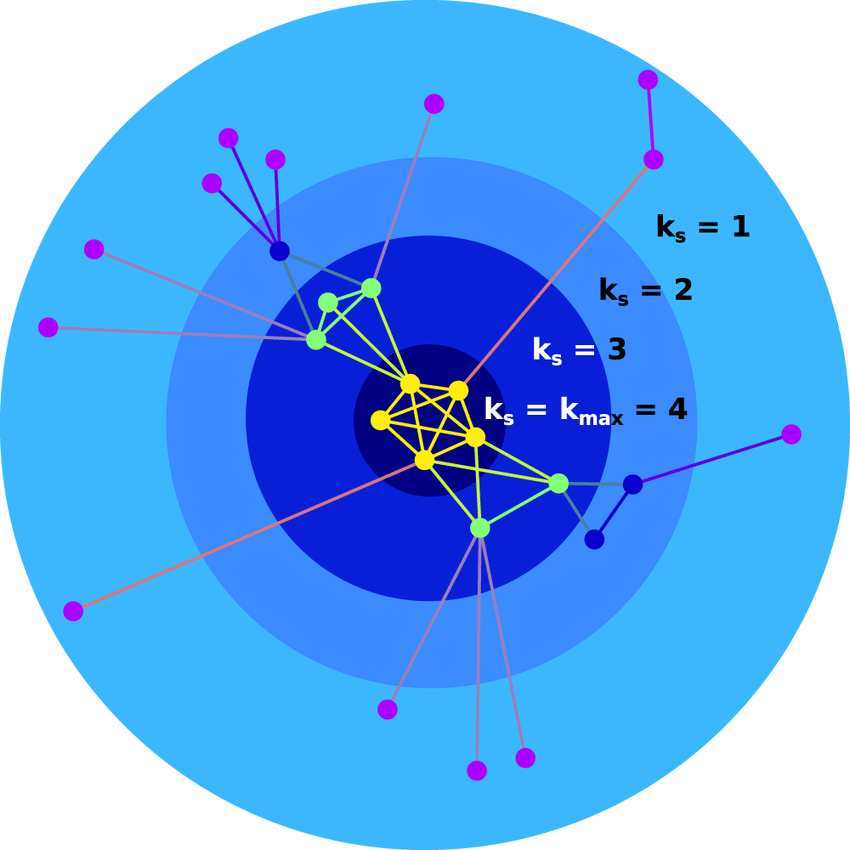

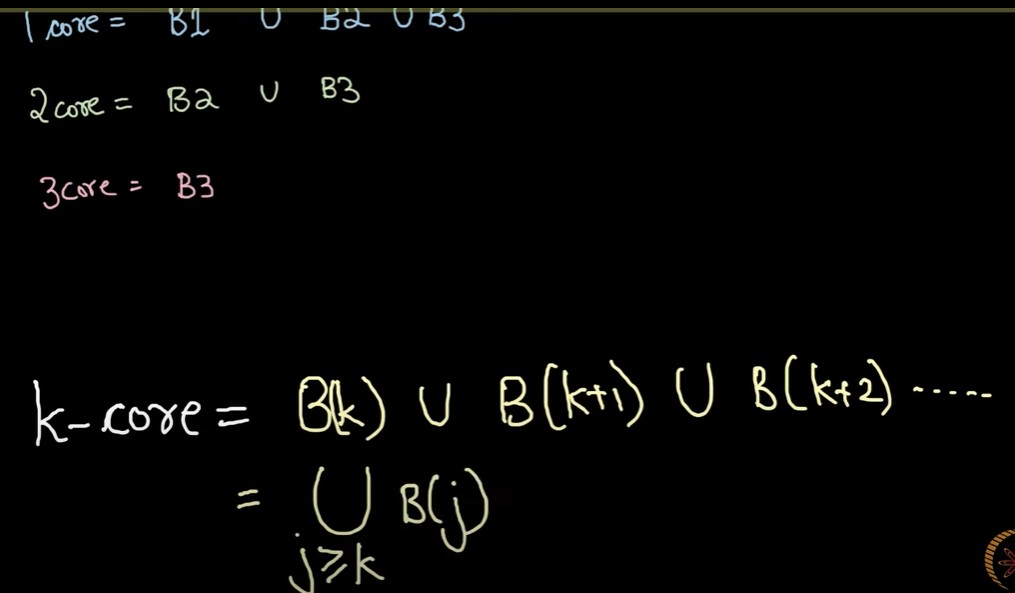

* #### Pseudo-core : A node that does not belong to the innermost core of the network but has equal spreading power (cascade capacity) as the innermost core.

* #### A subgraph of a graph is called as k-core if minimum degree of the nodes in the subgraph is k.

[[1, 2, 3, 4, 6, 7, 8, 9, 17, 5], [11, 10, 12], [13, 14, 15, 16]]


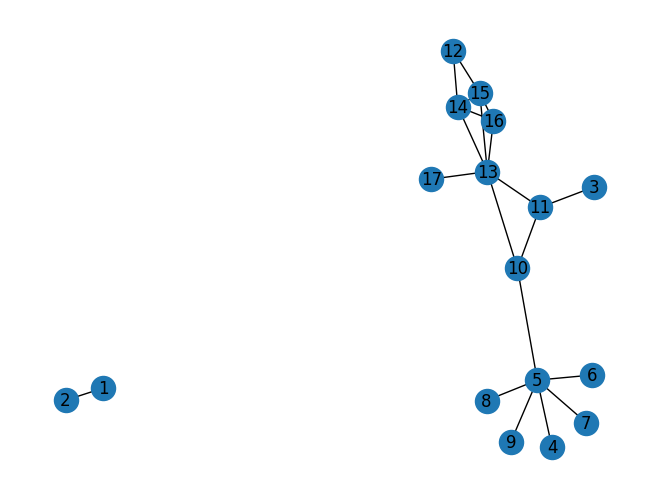

In [6]:
def check_existence(H,d1):
  f=0
  for each in H.nodes():
    if H.degree(each)<=d1:
      f=1
      break
  return f


def find(H,it):
  set1= []
  for each in H.nodes():
    if H.degree(each)<=it:
      set1.append(each)
  return set1 


G= nx.Graph()
G.add_edges_from([(1,2), (3,11), (4,5), (5,6), (5,7), (5,8), (5,9), (5,10), 
                  (10,11), (10,13), (11,13), (12,14), (12,15), (13,14), (13,15),
                  (13,16), (13,17), (14,15), (14,16), (15,16)])

H= G.copy()
it= 1
temp= []
buckets= []

while(1):
  flag= check_existence(H,it)

  if flag==0:
    it+=1
    buckets.append(temp)
    temp= []
  
  if flag==1:
    node_set= find(H,it)

    for each in node_set:
      H.remove_node(each)
      temp.append(each)
  
  if H.number_of_nodes()==0:
    buckets.append(temp)
    break 

print(buckets)
nx.draw(G, with_labels=True)
plt.show()

### Independent Cascade Model

In [7]:
def ic(G,s):
  print(s)
  just_inf= list(s)
  infected= list(s)
  
  while(1):
    print(just_inf, infected)
    if len(just_inf)==0:
      return infected 
    
    temp=[]
    for each in just_inf:
      for each1 in G.neighbors(each):
        
        r= random.uniform(0,1)
        if r<0.5 and each1 not in infected and each1 not in temp:
          temp.append(each1)

    for each in temp:
      infected.append(each)
    just_inf= list(temp)


G= nx.Graph()
G.add_edges_from([(1,2), (3,11), (4,5), (5,6), (5,7), (5,8), (5,9), (5,10), 
                  (10,11), (10,13), (11,13), (12,14), (12,15), (13,14), (13,15),
                  (13,16), (13,17), (14,15), (14,16), (15,16)])

seed= [3,8]
# Cascade Capacity of the seed
list1= ic(G,seed)

[3, 8]
[3, 8] [3, 8]
[5] [3, 8, 5]
[4, 6, 7] [3, 8, 5, 4, 6, 7]
[] [3, 8, 5, 4, 6, 7]


#### Who are the key nodes ( The nodes which should be initially infected in a network in order to go viral ) ?
* #### Nodes having high indegree?
* #### Nodes structurally closer to other nodes?
* #### Nodes having high betweeness?
* #### Nodes having high core value? 

#### Ans : Nodes having high core value

In [ ]:
def ic(G,s):
  just_inf= list(s)
  infected= list(s)
  
  while(1):
    if len(just_inf)==0:
      return infected 
    
    temp=[]
    for each in just_inf:
      for each1 in G.neighbors(each):
        
        r= random.uniform(0,1)
        if r<0.5 and each1 not in infected and each1 not in temp:
          temp.append(each1)

    for each in temp:
      infected.append(each)
    just_inf= list(temp)


G= nx.Graph()
G.add_edges_from([(1,2), (3,11), (4,5), (5,6), (5,7), (5,8), (5,9), (5,10), 
                  (10,11), (10,13), (11,13), (12,14), (12,15), (13,14), (13,15),
                  (13,16), (13,17), (14,15), (14,16), (15,16)])


dict_deg= {}
dict_cl= {}
dict_bw= {}
dict_cr= {}

for each in G.nodes():
  dict_deg[each]= G.degree(each)
  dict_cl[each]= nx.closeness_centrality(G,each)
  dict_bw[each]= nx.betweenness_centrality(G,each)
  dict_cr[each]= nx.core_number(G)[each]


dict_cascade= {}

for each in G.nodes():
  c= []
  for num in range(0,1000):
    seed= [each]
    i= ic(G,seed)
    c.append(len(i))
  dict_cascade[each]= np.average(c)

sorted_dict_cascade= sorted(dict_cascade, key= dict_cascade.get, reverse=True)
sorted_dict_deg= sorted(dict_deg, key= dict_deg.get, reverse=True)
sorted_dict_cl= sorted(dict_cl, key= dict_cl.get, reverse=True)
sorted_dict_bw= sorted(dict_bw, key= dict_bw.get, reverse=True)
sorted_dict_cr= sorted(dict_cr, key= dict_cr.get, reverse=True)